In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import plotly.offline as pyo
from plotly import subplots
import plotly.graph_objects as go

In [38]:
from baseFunctions import *
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [2]:
train = pd.read_csv('../train.csv')
oil = pd.read_csv('../oil.csv')
stores = pd.read_csv('../stores.csv')
transactions = pd.read_csv('../transactions.csv')
test = pd.read_csv('../test.csv')
holidays = pd.read_csv('../holidays_events.csv')
sampleSub = pd.read_csv('../sample_submission.csv')

In [3]:
train.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

# predict one single product/store pair

In [69]:
testPair = train.loc[(train.store_nbr == 6) & (train.family == 'LINGERIE')]#.sales.plot()

In [67]:
testPair['date'] = pd.to_datetime(testPair['date'])
testPair.set_index('date', inplace=True)

/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_29158/1922054664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testPair['date'] = pd.to_datetime(testPair['date'])


In [34]:
dec = sm.tsa.seasonal_decompose(testPair['sales'], model = 'multiplicative').plot()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

### let's figure out what's with 10 & lingere wrong -> dunno, seems outliers

<Axes: xlabel='date'>

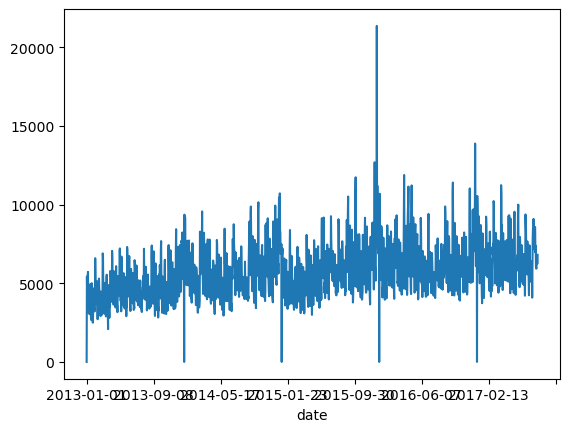

In [56]:
train.loc[(train.store_nbr == 10)].groupby('date').sum()['sales'].plot()

In [58]:
train.loc[(train.store_nbr == 10)]

,id,date,store_nbr,family,sales,onpromotion
33,33,2013-01-01,10,AUTOMOTIVE,0.000,0
34,34,2013-01-01,10,BABY CARE,0.000,0
35,35,2013-01-01,10,BEAUTY,0.000,0
36,36,2013-01-01,10,BEVERAGES,0.000,0
37,37,2013-01-01,10,BOOKS,0.000,0
...,...,...,...,...,...,...
2999167,2999167,2017-08-15,10,POULTRY,102.077,0
2999168,2999168,2017-08-15,10,PREPARED FOODS,26.000,0
2999169,2999169,2017-08-15,10,PRODUCE,256.911,62
2999170,2999170,2017-08-15,10,SCHOOL AND OFFICE SUPPLIES,18.000,3


<Axes: xlabel='date'>

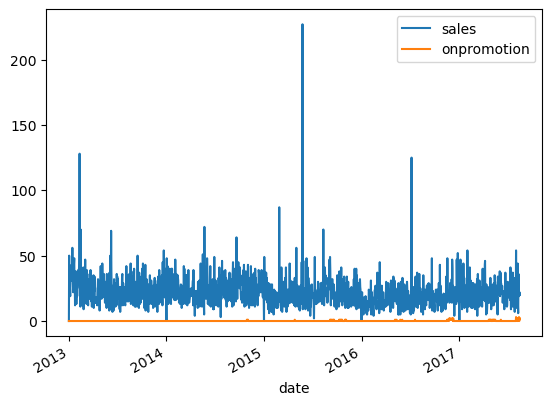

### dickey fuller tests

<Axes: >

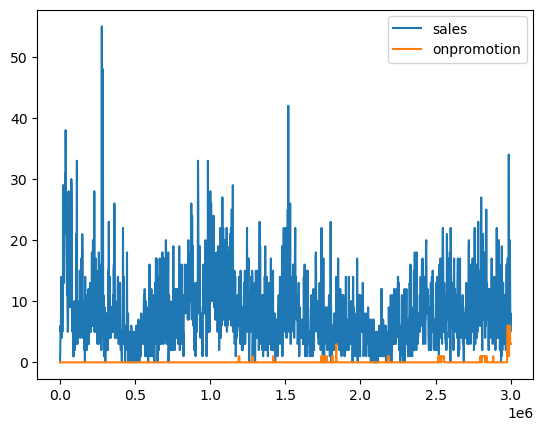

In [70]:
testPair[['sales','onpromotion']].plot()

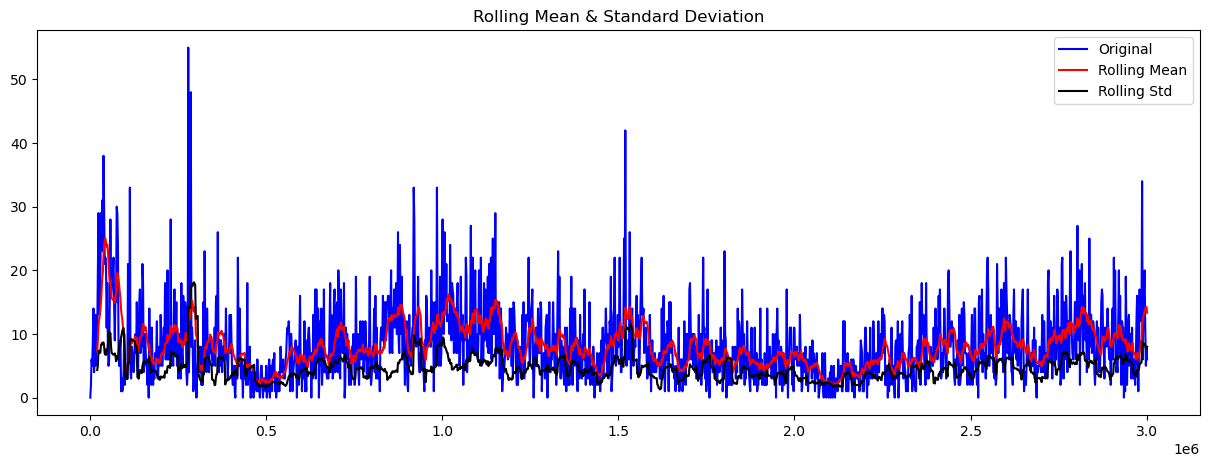

Results of Dickey-Fuller Test:
Test Statistic                   -4.995737
p-value                           0.000023
#Lags Used                       21.000000
Number of Observations Used    1662.000000
Critical Value (1%)              -3.434291
Critical Value (5%)              -2.863281
Critical Value (10%)             -2.567697
dtype: float64


In [71]:
test_stationarity(testPair['sales'])

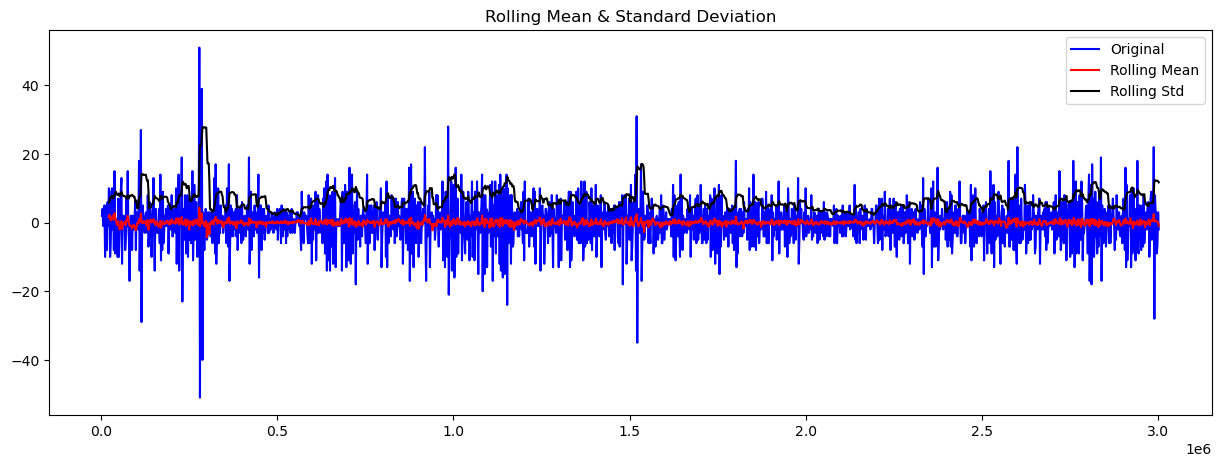

Results of Dickey-Fuller Test:
Test Statistic                -1.705372e+01
p-value                        8.036337e-30
#Lags Used                     2.000000e+01
Number of Observations Used    1.662000e+03
Critical Value (1%)           -3.434291e+00
Critical Value (5%)           -2.863281e+00
Critical Value (10%)          -2.567697e+00
dtype: float64


In [72]:
test_stationarity(testPair['sales'].diff().dropna())

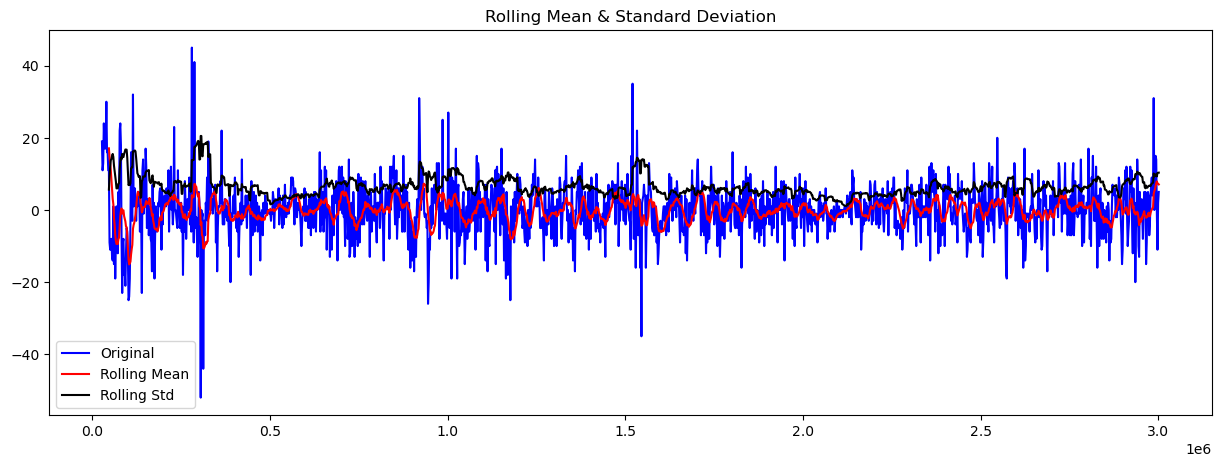

Results of Dickey-Fuller Test:
Test Statistic                -8.660475e+00
p-value                        4.837852e-14
#Lags Used                     2.100000e+01
Number of Observations Used    1.648000e+03
Critical Value (1%)           -3.434324e+00
Critical Value (5%)           -2.863295e+00
Critical Value (10%)          -2.567705e+00
dtype: float64


In [73]:
test_stationarity(testPair['sales'].diff(14).dropna())

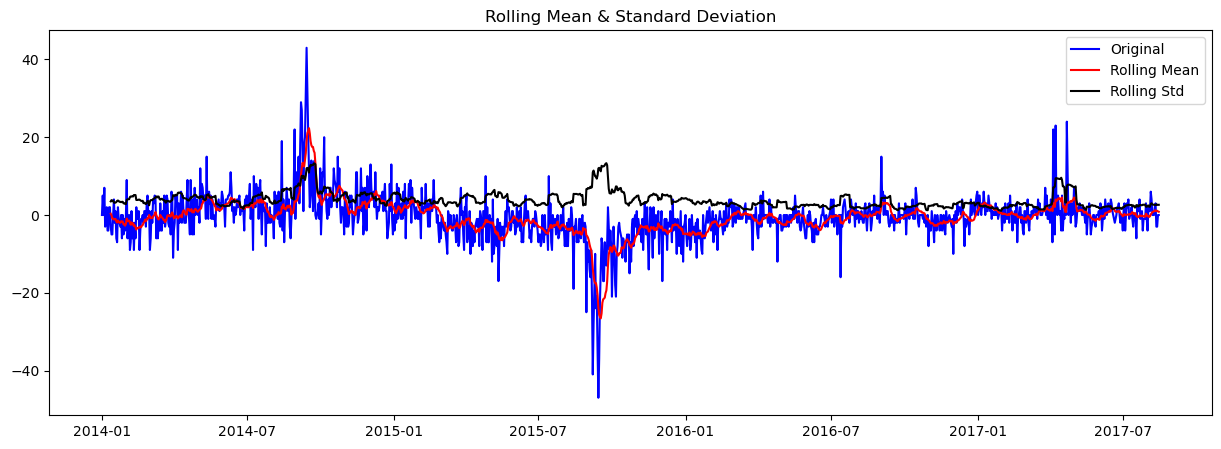

Results of Dickey-Fuller Test:
Test Statistic                   -4.838642
p-value                           0.000046
#Lags Used                        7.000000
Number of Observations Used    1312.000000
Critical Value (1%)              -3.435344
Critical Value (5%)              -2.863745
Critical Value (10%)             -2.567944
dtype: float64


In [54]:
test_stationarity(testPair['sales'].diff(364).dropna())

/Users/matthiaskargl/Codes/kaggle/store-sales-time-series-forecasting/analysis/baseFunctions.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.savefig(name + '_pacf.jpg')


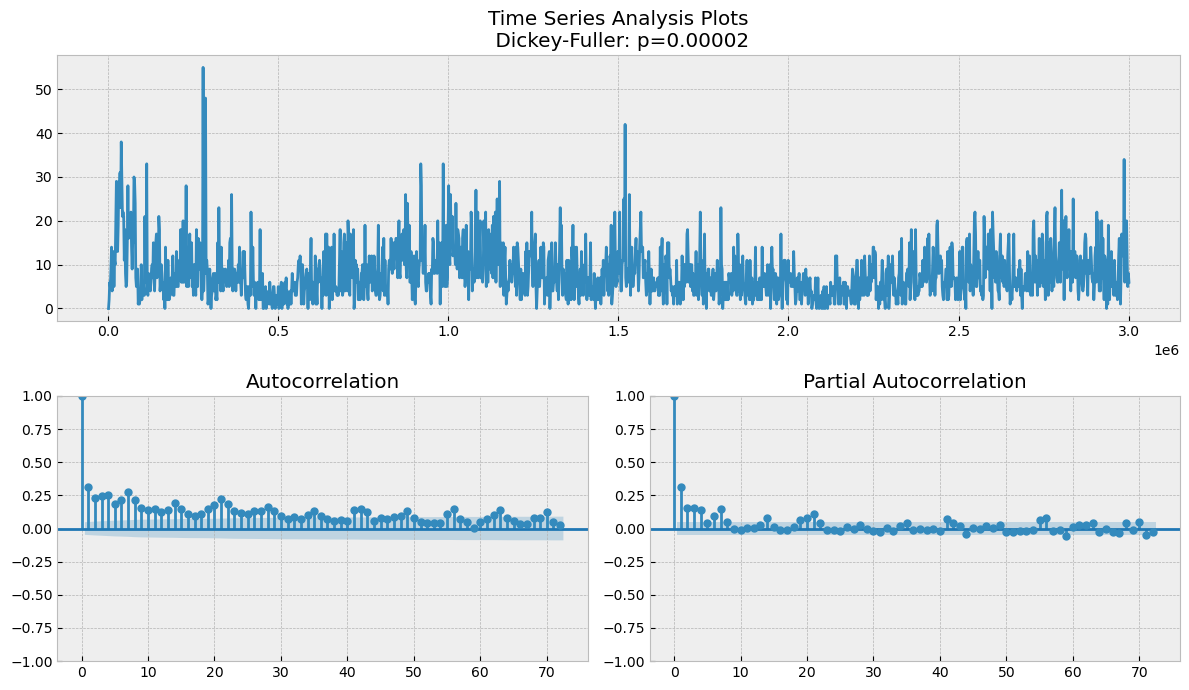

In [75]:
tsplot(testPair['sales'],lags = 72)

/Users/matthiaskargl/Codes/kaggle/store-sales-time-series-forecasting/analysis/baseFunctions.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.savefig(name + '_pacf.jpg')


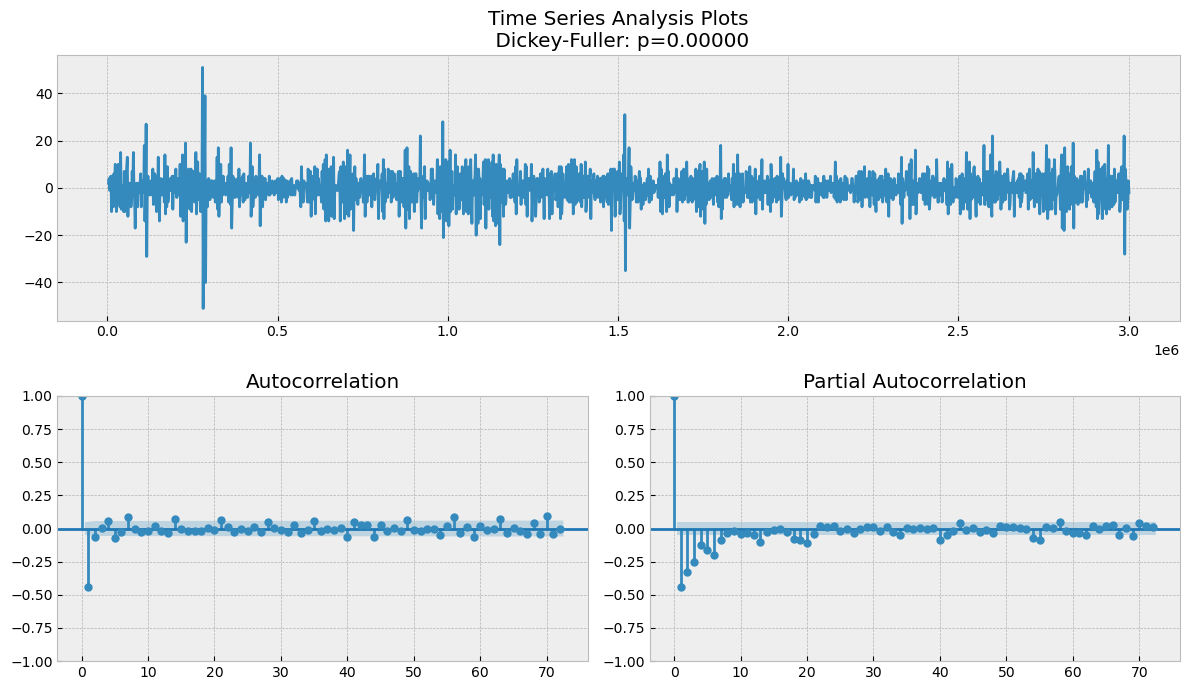

In [76]:
tsplot(testPair['sales'].diff().dropna(),lags = 72)

/Users/matthiaskargl/Codes/kaggle/store-sales-time-series-forecasting/analysis/baseFunctions.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.savefig(name + '_pacf.jpg')


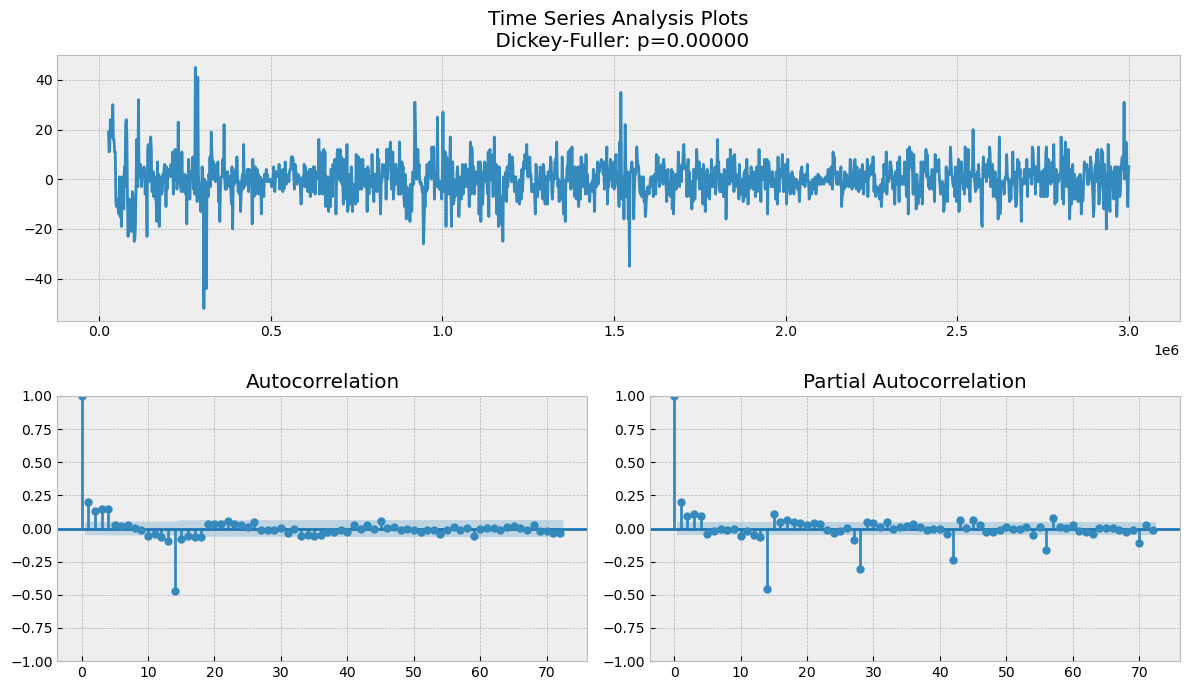

In [79]:
tsplot(testPair['sales'].diff(14).dropna(),lags = 72)

# let's try to predict one with AMIRA


In [87]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from statsmodels.tsa.arima.model import ARIMA
from numpy import mean, absolute, sqrt

In [81]:
testPair

,id,date,store_nbr,family,sales,onpromotion
1671,1671,2013-01-01,6,LINGERIE,0.0,0
3453,3453,2013-01-02,6,LINGERIE,2.0,0
5235,5235,2013-01-03,6,LINGERIE,6.0,0
7017,7017,2013-01-04,6,LINGERIE,5.0,0
8799,8799,2013-01-05,6,LINGERIE,9.0,0
...,...,...,...,...,...,...
2993649,2993649,2017-08-11,6,LINGERIE,20.0,6
2995431,2995431,2017-08-12,6,LINGERIE,11.0,4
2997213,2997213,2017-08-13,6,LINGERIE,5.0,3
2998995,2998995,2017-08-14,6,LINGERIE,8.0,3


In [91]:
testPair['date'] = pd.to_datetime(testPair['date'])
mask = testPair.date < pd.to_datetime("2017-01-1")
y_train = testPair['sales'][mask]
y_test = testPair['sales'][~mask]

/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_29158/2760086314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testPair['date'] = pd.to_datetime(testPair['date'])


In [100]:
model = ARIMA(y_train, order=(5, 1, 3))
model_fit = model.fit()

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [101]:
n = 14

y_pred_n = model_fit.forecast(n)
y_test_n = y_test[0:14]

fig = go.Figure()
trainN = y_train.shape[0]
length = n + trainN

fig.add_trace(go.Scatter(x=np.arange(1, trainN+1), y=y_train, mode='lines', name='train'))
fig.add_trace(go.Scatter(x=np.arange(trainN+1, length+1), y=y_pred_n, mode='lines', name='prediction'))
fig.add_trace(go.Scatter(x=np.arange(trainN+1, length+1), y=y_test_n, mode='lines', name='test'))
fig.show()



/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



### diff 1

### diff 14

# predict with simple network

### predict diff 1

In [104]:
testPair['sales_diff'] = testPair['sales'].diff()
# AR feature = last n values
# MA feautre = error of last n predictions

,id,date,store_nbr,family,sales,onpromotion
1671,1671,2013-01-01,6,LINGERIE,0.0,0
3453,3453,2013-01-02,6,LINGERIE,2.0,0
5235,5235,2013-01-03,6,LINGERIE,6.0,0
7017,7017,2013-01-04,6,LINGERIE,5.0,0
8799,8799,2013-01-05,6,LINGERIE,9.0,0
...,...,...,...,...,...,...
2993649,2993649,2017-08-11,6,LINGERIE,20.0,6
2995431,2995431,2017-08-12,6,LINGERIE,11.0,4
2997213,2997213,2017-08-13,6,LINGERIE,5.0,3
2998995,2998995,2017-08-14,6,LINGERIE,8.0,3


In [102]:
testPair['date'] = pd.to_datetime(testPair['date'])
mask = testPair.date < pd.to_datetime("2017-01-1")
trainSet = testPair['sales'][mask]
testSet = testPair['sales'][~mask]

/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_29158/2994421765.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
n = 14

y_pred_n = model_fit.forecast(n)
y_test_n = y_test[0:14]

fig = go.Figure()
trainN = y_train.shape[0]
length = n + trainN

fig.add_trace(go.Scatter(x=np.arange(1, trainN+1), y=y_train, mode='lines', name='train'))
fig.add_trace(go.Scatter(x=np.arange(trainN+1, length+1), y=y_pred_n, mode='lines', name='prediction'))
fig.add_trace(go.Scatter(x=np.arange(trainN+1, length+1), y=y_test_n, mode='lines', name='test'))
fig.show()